# 📊 <span style= "color: red;"> Predicting Diabetes Progression </span> using <span style= "color:blue;">Simple Linear Regression </span>

This project uses the `sklearn.datasets.load_diabetes()` dataset to explore how a patient’s health features (like age, BMI, blood pressure, etc.) relate to diabetes progression.

We build a simple linear regression model to predict the progression of diabetes one year after baseline.

🔍 Goal: Train the model on known data, and use it to predict for new/unseen cases.


In [66]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Load our diabetes dataset
diabetes = load_diabetes()

# Convert the data into a pandas dataframe
df = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)

# Add the target - 25 to 346
df['target'] = diabetes.target

# Grab the head
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [32]:
# split the data into X and y
# X = all features.......all the blood serum levels
# y = Target

X = df.drop('target', axis= 1)
y = df['target']
X.shape, y.shape

((442, 10), (442,))

* (442, 10) -> So you can see there are 442 rows of data and 10 columns
* (442,)    -> 442 rows and 1 column (we know tuple starts from zeroth)

In [84]:
from sklearn.model_selection import train_test_split
#split the data into traning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print out the shapes of training and testing sets
print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)

Training set shape:  (353, 10) (353,)
Testing set shape:  (89, 10) (89,)


In [86]:
from sklearn.linear_model import LinearRegression

# Create a Liner Regression Mode;
lr = LinearRegression()

In [88]:
#Train the model on the trainibg set - This is how the model learns
lr.fit(X_train, y_train)

LinearRegression()

In [100]:
# Now start Predicting on the Testing set

y_pred= lr.predict(X_test)
y_pred.shape

# Once we have the pred values, we can compare them to the actual values of the target variable, to evaluate the performance of the model

(89,)

## 📈 Model Evaluation: Comparing Predictions with Actual Values

Once our Simple Linear Regression model is trained, we want to know **how well it's performing**.

We do this by:
1. Predicting the target values on the test data (`X_test`)
2. Comparing these predicted values (`y_pred`) to the actual values (`y_test`)
3. Calculating error metrics like:
   - R² Score
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)

These metrics help us understand whether our model is just guessing or truly learning the relationship between inputs and outputs.


In [117]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the performance of the model
# R2 tells us How Useful our model is than compared to just guessing an average! High r2 is better
r2 = r2_score(y_test, y_pred) 

# MSE = Averaged squared distance distance between predicted and actaul values. Lower is better
mse = mean_squared_error(y_test, y_pred) 

# MAE = Mean Absolute Distance between predicted and actual values. Lower is better.
mae = mean_absolute_error(y_test, y_pred)

# Starting point of regression line on the y axis
# If positive number, target increases as features increase, if negative - opposite 
intercept = lr.intercept_

print("R2 score: ", r2)
print("Mean Squared Error: ", mae)
print("Mean Absolute Error: ", mae)
print("Intercept: ", intercept)

R2 score:  0.4526027629719196
Mean Squared Error:  42.79409467959993
Mean Absolute Error:  42.79409467959993
Intercept:  151.34560453985995


In [143]:
# To see how well your model fits the trainig data
bias = lr.score(X_train, y_train) # calculates r2 internally and returns it

# To see how well it perfoems on new, unseen data
variance = lr.score(X_test, y_test) 

print("Bias Training R2: ", bias)
print("Variance Test R2:",variance)

Bias Training R2:  0.5279193863361498
Variance Test R2: 0.4526027629719196


In [147]:
# CV - Covariance tells you how spread out the values are, compared to their mean.
# CV = (Standard Deviation / Mean )
# It's like asking - "Are my data values close to the average or dancing widly around?"

from scipy.stats import variation
variation(df['target'])

0.5061722361330858

From above cv = 0.56 means :
* On average, every data point is 50% away from the mean value

In [157]:
# What is SSR (Sum of Squares for Regression)?
# It compares how far your predicted values from the average.
# SSR asks: "How much better are my predictions than just guessing average?"

y_mean = np.mean(y)
SSR = np.sum((y_pred - y_mean)**2)
print("Sum of Square for Regression: ", SSR)

# SSR : "My predictions are somewhat better than just saying everyone's value is the average"

Sum of Square for Regression:  269300.8987799986


Text(0.5, 1.0, 'Predicted vs. Actual Values (Linear Regression)')

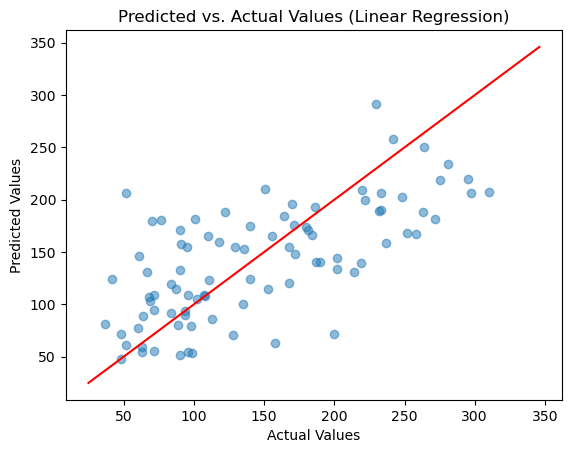

In [131]:
import matplotlib.pyplot as plt

# plot the predicted vs. actual values
# predicted values of the target variable are plotted on x-axis
# Actual values of target variable are plotted on y-axis
# If the modelis a good fit, the points should be close to the diagonal line
# indicating a strong linear realtionship between the actual and predicted values

plt.scatter(y_test, y_pred, alpha= 0.5)

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear Regression)")

Text(0.5, 1.0, 'Residual plot (Linear Regression)')

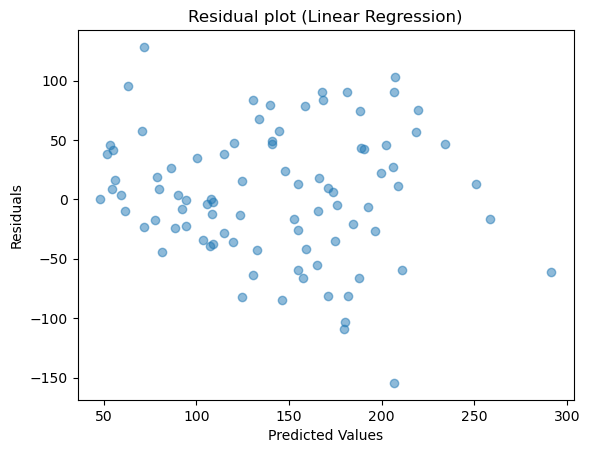

In [133]:
# plot the residuals
# the residual plot should show random scatter aroun 0, then its a good fit model
plt.scatter(y_pred, y_test-y_pred,alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual plot (Linear Regression)")

In [192]:
# create a dataframe with actual and predicted values
results = X_test.copy()

results['Actual'] = y_test  # Add the real target values
results['Predicted'] = y_pred # Add the predicted values from the model

# calculate the diffrence between predicted and actual values
results['Diff'] = results['Predicted'] - results['Actual']

# 🚨 Identify high-risk individuals (Predicted > 200)
high_risk = results[results['Predicted'] > 200]
high_risk.sort_values(by='Predicted', ascending=False)

# 🔝 Show top 10 high-risk individuals
print(high_risk[['Actual', 'Predicted', 'Diff']].head(10))

     Actual   Predicted        Diff
321   230.0  291.417029   61.417029
367   242.0  258.232389   16.232389
113   297.0  206.630817  -90.369183
172   295.0  219.530715  -75.469285
268   264.0  250.780323  -13.219677
116   275.0  218.575118  -56.424882
9     310.0  207.350502 -102.649498
0     151.0  210.742091   59.742091
56     52.0  206.493375  154.493375
291   248.0  202.185345  -45.814655
